In [1]:
# Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
#READ THE DATA IN THE OP_fraud_Data
OP_fraud_Data1=pd.read_csv(r"C:\Users\Dlc\Downloads\onlinePayment_fruadDetection.csv")
#LOAD THE DATA IN THE BACKUP FILE
OP_fraud_Data_bk1=OP_fraud_Data1.copy()
#TO READ THE FIRST 5 ROWS
OP_fraud_Data1.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [3]:
#Q1 => select all values "1"
#Q1 = psql.sqldf("select * from HealthIns_BK2 where Target_Variable = 1 ")

#Q2 => select all values "0"
#Q2 = psql.sqldf("select * from HealthIns_BK2 where Target_Variable = 0 ")


#Q3 => 20% of Q2
#MHealth = MHealth.groupby('Target_Variable', group_keys=False).apply(lambda x: x.sample(frac=0.2))

#Q1 + Q3
#Health = Q1.append(Q3, ignore_index=True)

In [4]:
Q1 = psql.sqldf("select * from OP_fraud_Data1 where isFraud = 1 ")


In [5]:
Q2 = psql.sqldf("select * from OP_fraud_Data1 where isFraud = 0 ")


In [6]:
OP_fraud_Data1= OP_fraud_Data1.groupby('isFraud', group_keys=False).apply(lambda x: x.sample(frac=0.01))


In [7]:
OP_fraud_Data = Q1.append(OP_fraud_Data1, ignore_index=True)

In [8]:
OP_fraud_Data.shape

(71839, 11)

In [9]:
#to check whether there is any duplicates or not
OP_fraud_Data.duplicated().any()

True

In [10]:
OP_fraud_Data=OP_fraud_Data.drop_duplicates()

In [11]:
OP_fraud_Data.shape

(71757, 11)

In [12]:
#to check whether there is any missing values or not
OP_fraud_Data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
#to get the detail of the OP_fraud_Data
OP_fraud_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71757 entries, 0 to 71756
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            71757 non-null  int64  
 1   type            71757 non-null  object 
 2   amount          71757 non-null  float64
 3   nameOrig        71757 non-null  object 
 4   oldbalanceOrg   71757 non-null  float64
 5   newbalanceOrig  71757 non-null  float64
 6   nameDest        71757 non-null  object 
 7   oldbalanceDest  71757 non-null  float64
 8   newbalanceDest  71757 non-null  float64
 9   isFraud         71757 non-null  int64  
 10  isFlaggedFraud  71757 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 6.6+ MB


In [14]:
# use Labelencoder to handle catgorical data
#from sklearn.preprocessing import LabelEncoder

#LE = LabelEncoder()

#LoanData['purpose'] = LE.fit_transform(LoanData['purpose'])

#-------------------------------------------------------------------------------------
# 'map' function to convert the categorical values to numerical format

#CustChurn['Geography'] = CustChurn['Geography'].map({'Spain':0,'Germany':1,'France':2})
#CustChurn['Gender'] = CustChurn['Gender'].map({'Male':1,'Female':0})
# Same as str.replace command

In [15]:
#to know about the no of rows and columns in the dataset
OP_fraud_Data.shape

(71757, 11)

In [16]:
OP_fraud_Data['isFlaggedFraud'].value_counts()

0    71741
1       16
Name: isFlaggedFraud, dtype: int64

In [17]:
OP_fraud_Data['type'].value_counts()

CASH_OUT    26473
PAYMENT     21349
CASH_IN     14119
TRANSFER     9411
DEBIT         405
Name: type, dtype: int64

In [18]:
OP_fraud_Data['nameOrig'].value_counts()

C619489235     2
C826386973     2
C1305486145    1
C1009916891    1
C860395437     1
              ..
C1595907624    1
C1953480415    1
C713373514     1
C83007782      1
C1543102801    1
Name: nameOrig, Length: 71755, dtype: int64

In [19]:
OP_fraud_Data['nameDest'].value_counts()

C800980282     5
C288197656     4
C991505714     4
C2038006108    4
C546307418     4
              ..
C1259799663    1
C1623132066    1
M1819330400    1
M961908366     1
C494040824     1
Name: nameDest, Length: 68283, dtype: int64

In [20]:
# use Labelencoder to handle catgorical data
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

OP_fraud_Data['type'] = LE.fit_transform(OP_fraud_Data['type'])
OP_fraud_Data['nameOrig'] = LE.fit_transform(OP_fraud_Data['nameOrig'])
OP_fraud_Data['nameDest'] = LE.fit_transform(OP_fraud_Data['nameDest'])


In [21]:
#count the target or dependent variable by '0' & '1' and their proportion
#(>=10 : 1,then the dataset is imbalance data)
isFraud_count=OP_fraud_Data.isFraud.value_counts()
print('class 0:',isFraud_count[0])
print('class 1:',isFraud_count[1])
print('proportions:',round(isFraud_count[0]/isFraud_count[1],2),':1')
print('Total  records:',len(OP_fraud_Data))

class 0: 63544
class 1: 8213
proportions: 7.74 :1
Total  records: 71757


In [22]:
OP_fraud_Data

step  type     amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
0         1     4     181.00     11270         181.00            0.00   
1         1     1     181.00     65686         181.00            0.00   
2         1     4    2806.00     15520        2806.00            0.00   
3         1     1    2806.00     40798        2806.00            0.00   
4         1     4   20128.00     13837       20128.00            0.00   
...     ...   ...        ...       ...            ...             ...   
71752   359     3    8768.15     33096       22196.11        13427.96   
71753   353     1  205942.66     46173       40948.00            0.00   
71754   232     3   16352.15     27209      181140.48       164788.33   
71755     8     3    3665.94     19089     1680149.73      1676483.79   
71756   233     1   48746.35     20054       18903.00            0.00   

       nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0         36084            0.00            0.00        1               0  
1         32097        21182.00            0.00        1               0  
2         46250            0.00            0.00        1               0  
3           202        26202.00            0.00        1               0  
4         20567            0.00            0.00        1               0  
...         ...             ...             ...      ...             ...  
71752     64227            0.00            0.00        0               0  
71753     21738            0.00       205942.66        0               0  
71754     63804            0.00            0.00        0               0  
71755     62434            0.00            0.00        0               0  
71756     34606      1016237.57      1064983.92        0               0  

[71757 rows x 11 columns]

In [23]:
OP_fraud_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71757 entries, 0 to 71756
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            71757 non-null  int64  
 1   type            71757 non-null  int32  
 2   amount          71757 non-null  float64
 3   nameOrig        71757 non-null  int32  
 4   oldbalanceOrg   71757 non-null  float64
 5   newbalanceOrig  71757 non-null  float64
 6   nameDest        71757 non-null  int32  
 7   oldbalanceDest  71757 non-null  float64
 8   newbalanceDest  71757 non-null  float64
 9   isFraud         71757 non-null  int64  
 10  isFlaggedFraud  71757 non-null  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 5.7 MB


In [24]:
## Lets drop unuseful coloumns from the dataset
OP_fraud_Data.drop(['nameOrig','nameDest','isFlaggedFraud'], axis=1, inplace=True)

In [25]:
OP_fraud_Data

step  type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0         1     4     181.00         181.00            0.00            0.00   
1         1     1     181.00         181.00            0.00        21182.00   
2         1     4    2806.00        2806.00            0.00            0.00   
3         1     1    2806.00        2806.00            0.00        26202.00   
4         1     4   20128.00       20128.00            0.00            0.00   
...     ...   ...        ...            ...             ...             ...   
71752   359     3    8768.15       22196.11        13427.96            0.00   
71753   353     1  205942.66       40948.00            0.00            0.00   
71754   232     3   16352.15      181140.48       164788.33            0.00   
71755     8     3    3665.94     1680149.73      1676483.79            0.00   
71756   233     1   48746.35       18903.00            0.00      1016237.57   

       newbalanceDest  isFraud  
0                0.00        1  
1                0.00        1  
2                0.00        1  
3                0.00        1  
4                0.00        1  
...               ...      ...  
71752            0.00        0  
71753       205942.66        0  
71754            0.00        0  
71755            0.00        0  
71756      1064983.92        0  

[71757 rows x 8 columns]

In [26]:
#IDENTIFY THE TARGET(LABLED) AND INDEPENDENT VARIABLE
indepVar=[]
for col in OP_fraud_Data.columns:
    if col !='isFraud':
        indepVar.append(col)
        
TargetVar='isFraud'
x=OP_fraud_Data[indepVar]
y=OP_fraud_Data[TargetVar]

In [ ]:
# Random oversampling can be implemented using the RandomOverSampler class

#from imblearn.over_sampling import RandomOverSampler

#oversample = RandomOverSampler(sampling_strategy=0.125)

#x_over, y_over = oversample.fit_resample(x, y)

#print(x_over.shape)
#print(y_over.shape)

In [27]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# Display the shape for train & test data

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((50229, 7), (21528, 7), (50229,), (21528,))

In [28]:
# Scaling the features by using MinMaxScaler
#CONVERTS THE COLUMN VALUES INTO  0'S AND 1'S
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train= mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test= mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [29]:
x_train.head()

0     1         2             3         4         5         6
0  0.381402  0.75  0.000062  9.541847e-07  0.000000  0.000000  0.000000
1  0.020216  0.75  0.000104  1.632387e-03  0.001917  0.000000  0.000000
2  0.469003  0.00  0.006865  4.037740e-02  0.058224  0.005168  0.003819
3  0.063342  0.75  0.000307  0.000000e+00  0.000000  0.000000  0.000000
4  0.439353  0.00  0.003387  1.132958e-05  0.003888  0.013770  0.013090

In [30]:
x_test.head()

0     1         2         3         4         5         6
0  0.010782  0.00  0.000923  0.101181  0.122253  0.003151  0.003004
1  0.207547  0.25  0.000761  0.001965  0.001812  0.000000  0.000115
2  0.681941  1.00  0.063973  0.038458  0.000000  0.000000  0.000000
3  0.444744  0.25  0.008164  0.000528  0.000000  0.002240  0.003881
4  0.179245  0.75  0.001380  0.001354  0.000631  0.000000  0.000000

# KNN ALGORITHM

In [31]:
#READ THE DATA IN THE HRDATA
KNN_Results=pd.read_csv(r"C:\Users\Dlc\Desktop\datasets\KNN_Results.csv")
#LOAD THE DATA IN THE BACKUP FILE
KNN_Results.head()

Empty DataFrame
Columns: [Model Name, KNN K Value, True_Positive, False_Negative, False_Positive, True_Negative, Accuracy, Precision, Recall, F1 Score, Specificity, MCC, ROC_AUC_Score, Balanced Accuracy]
Index: []

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 2090   339]
 [  211 18888]]
Outcome values : 
 2090 339 211 18888
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.86      0.88      2429
           0       0.98      0.99      0.99     19099

    accuracy                           0.97     21528
   macro avg       0.95      0.92      0.93     21528
weighted avg       0.97      0.97      0.97     21528

Accuracy : 97.4 %
Precision : 90.8 %
Recall : 86.0 %
F1 Score : 0.884
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 92.4 %
MCC : 0
roc_auc_score: 0.925


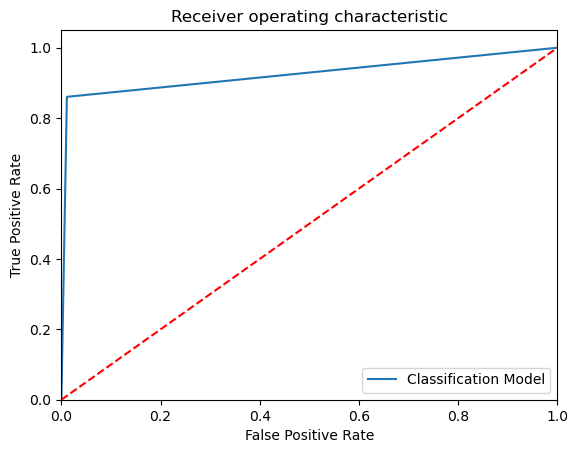

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 1964   465]
 [   80 19019]]
Outcome values : 
 1964 465 80 19019
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.81      0.88      2429
           0       0.98      1.00      0.99     19099

    accuracy                           0.97     21528
   macro avg       0.97      0.90      0.93     21528
weighted avg       0.97      0.97      0.97     21528

Accuracy : 97.5 %
Precision : 96.1 %
Recall : 80.9 %
F1 Score : 0.878
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 90.3 %
MCC : 0
roc_auc_score: 0.902


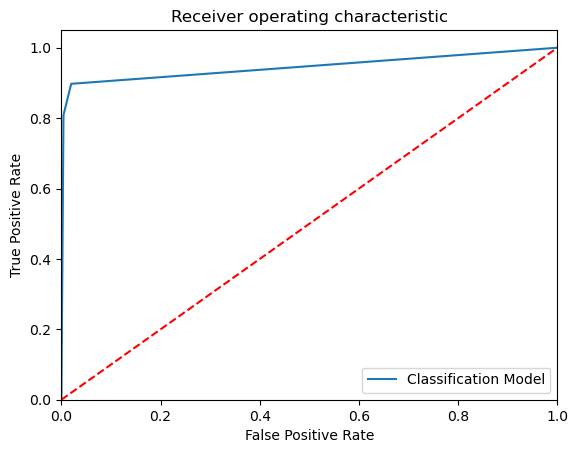

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[ 2073   356]
 [  167 18932]]
Outcome values : 
 2073 356 167 18932
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.85      0.89      2429
           0       0.98      0.99      0.99     19099

    accuracy                           0.98     21528
   macro avg       0.95      0.92      0.94     21528
weighted avg       0.98      0.98      0.98     21528

Accuracy : 97.6 %
Precision : 92.5 %
Recall : 85.3 %
F1 Score : 0.888
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 92.2 %
MCC : 0
roc_auc_score: 0.922


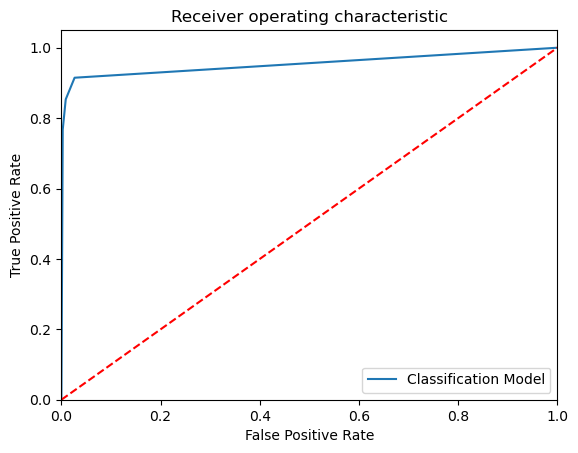

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[ 1992   437]
 [  106 18993]]
Outcome values : 
 1992 437 106 18993
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.82      0.88      2429
           0       0.98      0.99      0.99     19099

    accuracy                           0.97     21528
   macro avg       0.96      0.91      0.93     21528
weighted avg       0.97      0.97      0.97     21528

Accuracy : 97.5 %
Precision : 94.9 %
Recall : 82.0 %
F1 Score : 0.88
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 90.7 %
MCC : 0
roc_auc_score: 0.907


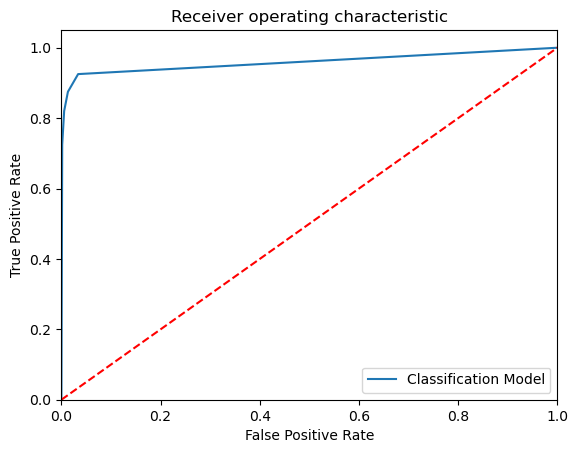

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 2051   378]
 [  156 18943]]
Outcome values : 
 2051 378 156 18943
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.84      0.88      2429
           0       0.98      0.99      0.99     19099

    accuracy                           0.98     21528
   macro avg       0.95      0.92      0.94     21528
weighted avg       0.97      0.98      0.97     21528

Accuracy : 97.5 %
Precision : 92.9 %
Recall : 84.4 %
F1 Score : 0.885
Specificity or True Negative Rate : 99.2 %
Balanced Accuracy : 91.8 %
MCC : 0
roc_auc_score: 0.918


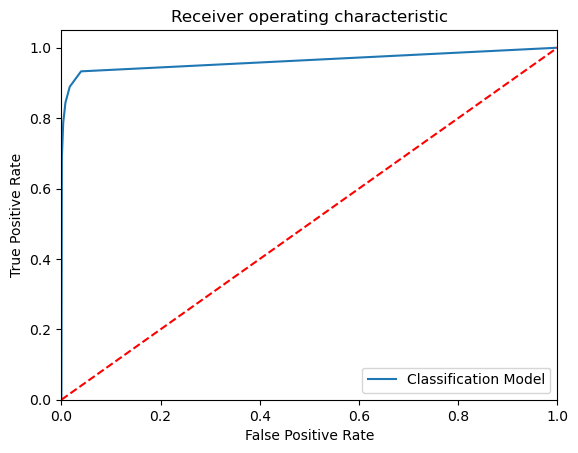

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[ 1986   443]
 [  111 18988]]
Outcome values : 
 1986 443 111 18988
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.82      0.88      2429
           0       0.98      0.99      0.99     19099

    accuracy                           0.97     21528
   macro avg       0.96      0.91      0.93     21528
weighted avg       0.97      0.97      0.97     21528

Accuracy : 97.4 %
Precision : 94.7 %
Recall : 81.8 %
F1 Score : 0.878
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 90.6 %
MCC : 0
roc_auc_score: 0.906


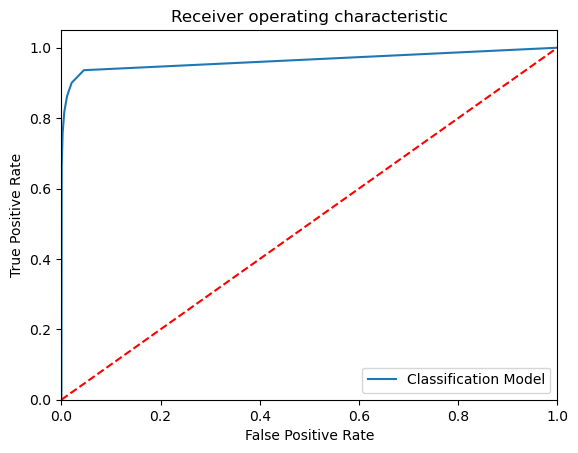

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[ 2030   399]
 [  158 18941]]
Outcome values : 
 2030 399 158 18941
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.84      0.88      2429
           0       0.98      0.99      0.99     19099

    accuracy                           0.97     21528
   macro avg       0.95      0.91      0.93     21528
weighted avg       0.97      0.97      0.97     21528

Accuracy : 97.4 %
Precision : 92.8 %
Recall : 83.6 %
F1 Score : 0.879
Specificity or True Negative Rate : 99.2 %
Balanced Accuracy : 91.4 %
MCC : 0
roc_auc_score: 0.914


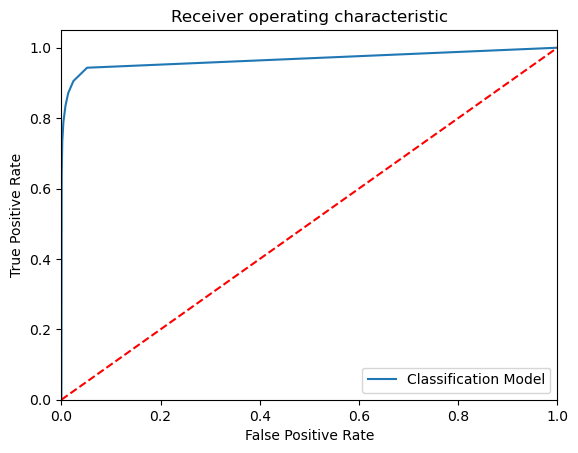

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[ 1973   456]
 [  119 18980]]
Outcome values : 
 1973 456 119 18980
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.81      0.87      2429
           0       0.98      0.99      0.99     19099

    accuracy                           0.97     21528
   macro avg       0.96      0.90      0.93     21528
weighted avg       0.97      0.97      0.97     21528

Accuracy : 97.3 %
Precision : 94.3 %
Recall : 81.2 %
F1 Score : 0.873
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 90.3 %
MCC : 0
roc_auc_score: 0.903


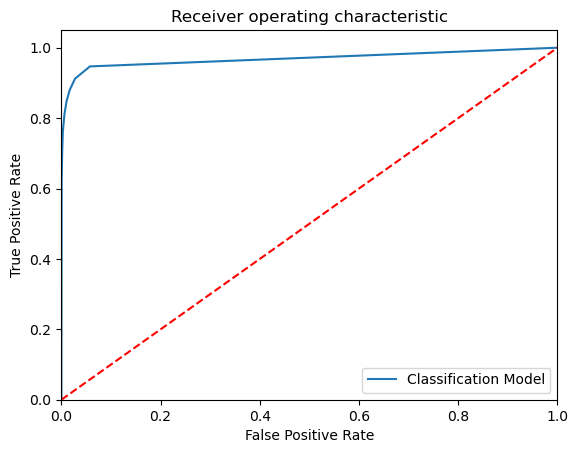

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[ 2008   421]
 [  150 18949]]
Outcome values : 
 2008 421 150 18949
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.83      0.88      2429
           0       0.98      0.99      0.99     19099

    accuracy                           0.97     21528
   macro avg       0.95      0.91      0.93     21528
weighted avg       0.97      0.97      0.97     21528

Accuracy : 97.3 %
Precision : 93.0 %
Recall : 82.7 %
F1 Score : 0.876
Specificity or True Negative Rate : 99.2 %
Balanced Accuracy : 91.0 %
MCC : 0
roc_auc_score: 0.909


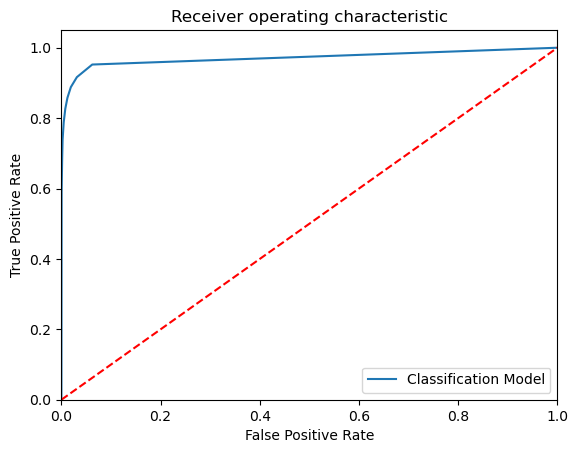

In [33]:
# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1,10, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    #MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    MCC=0
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)

In [34]:
KNN_Results

Model Name KNN K Value True_Positive  \
0   KNeighborsClassifier(n_neighbors=1)           1          2090   
1   KNeighborsClassifier(n_neighbors=2)           2          1964   
2   KNeighborsClassifier(n_neighbors=3)           3          2073   
3   KNeighborsClassifier(n_neighbors=4)           4          1992   
4   KNeighborsClassifier(n_neighbors=1)           1          2090   
5   KNeighborsClassifier(n_neighbors=2)           2          1964   
6   KNeighborsClassifier(n_neighbors=3)           3          2073   
7   KNeighborsClassifier(n_neighbors=4)           4          1992   
8                KNeighborsClassifier()           5          2051   
9   KNeighborsClassifier(n_neighbors=6)           6          1986   
10  KNeighborsClassifier(n_neighbors=7)           7          2030   
11  KNeighborsClassifier(n_neighbors=8)           8          1973   
12  KNeighborsClassifier(n_neighbors=9)           9          2008   

   False_Negative False_Positive True_Negative  Accuracy  Precision  Recall  \
0             339            211         18888     0.974      0.908   0.860   
1             465             80         19019     0.975      0.961   0.809   
2             356            167         18932     0.976      0.925   0.853   
3             437            106         18993     0.975      0.949   0.820   
4             339            211         18888     0.974      0.908   0.860   
5             465             80         19019     0.975      0.961   0.809   
6             356            167         18932     0.976      0.925   0.853   
7             437            106         18993     0.975      0.949   0.820   
8             378            156         18943     0.975      0.929   0.844   
9             443            111         18988     0.974      0.947   0.818   
10            399            158         18941     0.974      0.928   0.836   
11            456            119         18980     0.973      0.943   0.812   
12            421            150         18949     0.973      0.930   0.827   

    F1 Score  Specificity MCC  ROC_AUC_Score  Balanced Accuracy  
0      0.884        0.989   0       0.924694              0.924  
1      0.878        0.996   0       0.902187              0.903  
2      0.888        0.991   0       0.922347              0.922  
3      0.880        0.994   0       0.907270              0.907  
4      0.884        0.989   0       0.924694              0.924  
5      0.878        0.996   0       0.902187              0.903  
6      0.888        0.991   0       0.922347              0.922  
7      0.880        0.994   0       0.907270              0.907  
8      0.885        0.992   0       0.918106              0.918  
9      0.878        0.994   0       0.905904              0.906  
10     0.879        0.992   0       0.913731              0.914  
11     0.873        0.994   0       0.903019              0.903  
12     0.876        0.992   0       0.909412              0.910

In [35]:
#READ THE DATA IN THE HRDATA
EMRESULTS=pd.read_csv(r"C:\Users\Dlc\Downloads\RESULTS.csv")
#LOAD THE DATA IN THE BACKUP FILE
EMRESULTS.head()

Empty DataFrame
Columns: [Model Name, True_Positive, False_Negative, False_Positive, True_Negative, Accuracy, Precision, Recall, F1 Score, Specificity, MCC, ROC_AUC_Score, Balanced Accuracy]
Index: []

# SVM Linear Kernal Algorithm

Model Name:  SVM - Linear
Confusion matrix : 
 [[  568  1861]
 [   10 19089]]
Outcome values : 
 568 1861 10 19089
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.23      0.38      2429
           0       0.91      1.00      0.95     19099

    accuracy                           0.91     21528
   macro avg       0.95      0.62      0.67     21528
weighted avg       0.92      0.91      0.89     21528

Accuracy : 91.3 %
Precision : 98.3 %
Recall : 23.4 %
F1 Score : 0.378
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 61.6 %
MCC : 0.457
roc_auc_score: 0.617


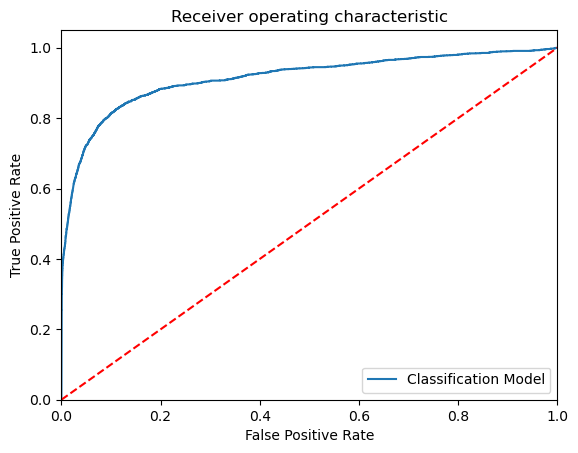

-----------------------------------------------------------------------------------------------------


In [36]:

# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMRESULTS = EMRESULTS.append(new_row, ignore_index=True)
#-------------------------------------------------------------------------------------------------------------

# SVM Polynomial Kernal Algorithm

Model Name:  SVM - Polynominal
Confusion matrix : 
 [[ 1027  1402]
 [    6 19093]]
Outcome values : 
 1027 1402 6 19093
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.42      0.59      2429
           0       0.93      1.00      0.96     19099

    accuracy                           0.93     21528
   macro avg       0.96      0.71      0.78     21528
weighted avg       0.94      0.93      0.92     21528

Accuracy : 93.5 %
Precision : 99.4 %
Recall : 42.3 %
F1 Score : 0.593
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 71.2 %
MCC : 0.625
roc_auc_score: 0.711


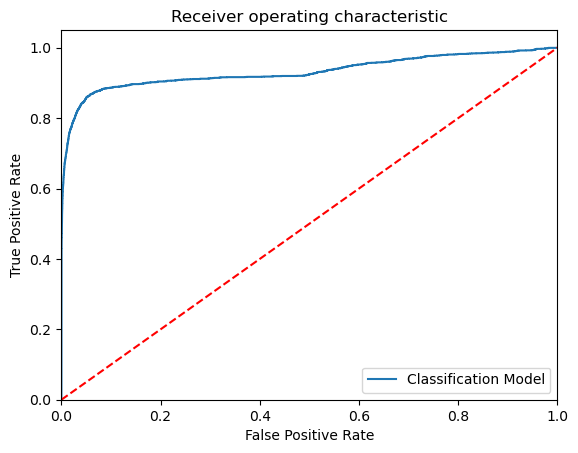

-----------------------------------------------------------------------------------------------------


In [37]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMRESULTS = EMRESULTS.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------

# SVM Gaussian Kernal Algorithm

Model Name:  SVM - Gaussian
Confusion matrix : 
 [[ 1940   489]
 [ 1161 17938]]
Outcome values : 
 1940 489 1161 17938
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.80      0.70      2429
           0       0.97      0.94      0.96     19099

    accuracy                           0.92     21528
   macro avg       0.80      0.87      0.83     21528
weighted avg       0.93      0.92      0.93     21528

Accuracy : 92.3 %
Precision : 62.6 %
Recall : 79.9 %
F1 Score : 0.702
Specificity or True Negative Rate : 93.9 %
Balanced Accuracy : 86.9 %
MCC : 0.665
roc_auc_score: 0.869


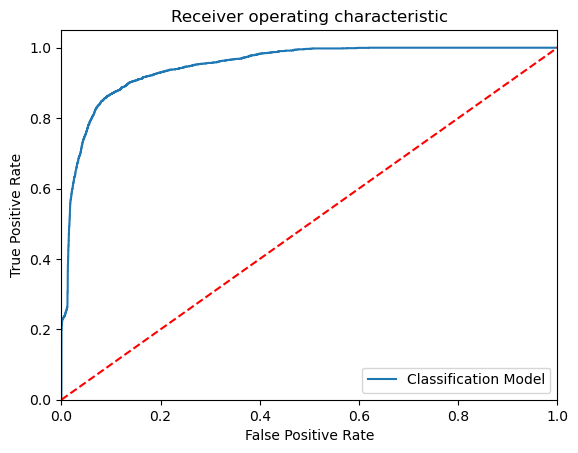

-----------------------------------------------------------------------------------------------------


In [38]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMRESULTS = EMRESULTS.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------

# SVM Sigmoid Kernal Algorithm

Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[ 1027  1402]
 [10690  8409]]
Outcome values : 
 1027 1402 10690 8409
Classification report : 
               precision    recall  f1-score   support

           1       0.09      0.42      0.15      2429
           0       0.86      0.44      0.58     19099

    accuracy                           0.44     21528
   macro avg       0.47      0.43      0.36     21528
weighted avg       0.77      0.44      0.53     21528

Accuracy : 43.8 %
Precision : 8.8 %
Recall : 42.3 %
F1 Score : 0.145
Specificity or True Negative Rate : 44.0 %
Balanced Accuracy : 43.2 %
MCC : -0.087
roc_auc_score: 0.432


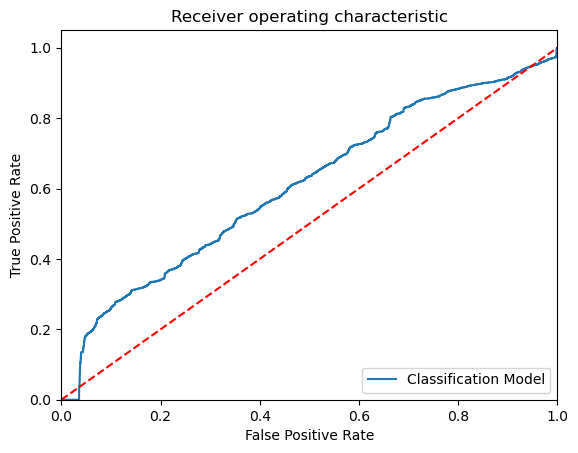

-----------------------------------------------------------------------------------------------------


In [39]:

# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMRESULTS = EMRESULTS.append(new_row, ignore_index=True)
#--------------------------------------------------------------------

In [41]:
EMRESULTS.head()

Model Name True_Positive False_Negative False_Positive  \
0       SVM - Linear           568           1861             10   
1  SVM - Polynominal          1027           1402              6   
2     SVM - Gaussian          1940            489           1161   
3      SVM - Sigmoid          1027           1402          10690   

  True_Negative  Accuracy  Precision  Recall  F1 Score  Specificity    MCC  \
0         19089     0.913      0.983   0.234     0.378        0.999  0.457   
1         19093     0.935      0.994   0.423     0.593        1.000  0.625   
2         17938     0.923      0.626   0.799     0.702        0.939  0.665   
3          8409     0.438      0.088   0.423     0.145        0.440 -0.087   

   ROC_AUC_Score  Balanced Accuracy  
0       0.616659              0.616  
1       0.711247              0.712  
2       0.868947              0.869  
3       0.431546              0.432

# comparing Classification Algorithm

Model Name:  LogisticRegression()
Confusion matrix : 
 [[  648  1781]
 [   69 19030]]
Outcome values : 
 648 1781 69 19030
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.27      0.41      2429
           0       0.91      1.00      0.95     19099

    accuracy                           0.91     21528
   macro avg       0.91      0.63      0.68     21528
weighted avg       0.91      0.91      0.89     21528

Accuracy : 91.4 %
Precision : 90.4 %
Recall : 26.7 %
F1 Score : 0.412
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 63.2 %
MCC : 0
roc_auc_score: 0.632


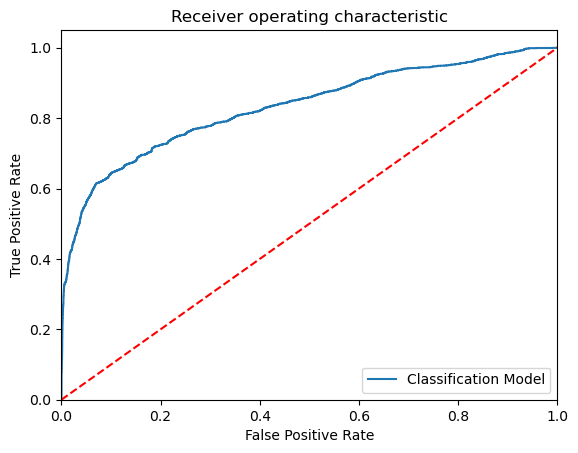

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 1497   932]
 [   17 19082]]
Outcome values : 
 1497 932 17 19082
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.62      0.76      2429
           0       0.95      1.00      0.98     19099

    accuracy                           0.96     21528
   macro avg       0.97      0.81      0.87     21528
weighted avg       0.96      0.96      0.95     21528

Accuracy : 95.6 %
Precision : 98.9 %
Recall : 61.6 %
F1 Score : 0.759
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 80.8 %
MCC : 0
roc_auc_score: 0.808


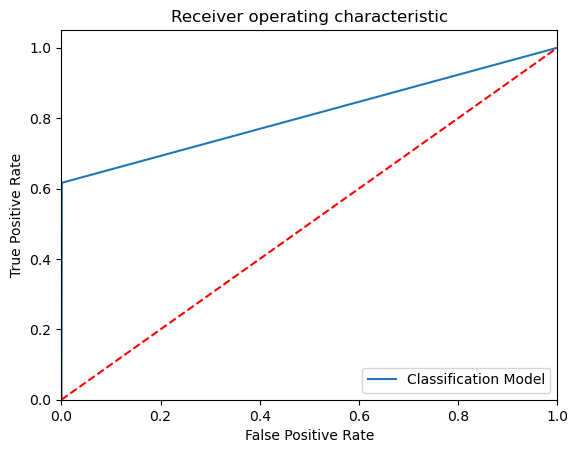

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 2003   426]
 [    6 19093]]
Outcome values : 
 2003 426 6 19093
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.82      0.90      2429
           0       0.98      1.00      0.99     19099

    accuracy                           0.98     21528
   macro avg       0.99      0.91      0.95     21528
weighted avg       0.98      0.98      0.98     21528

Accuracy : 98.0 %
Precision : 99.7 %
Recall : 82.5 %
F1 Score : 0.903
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 91.2 %
MCC : 0
roc_auc_score: 0.912


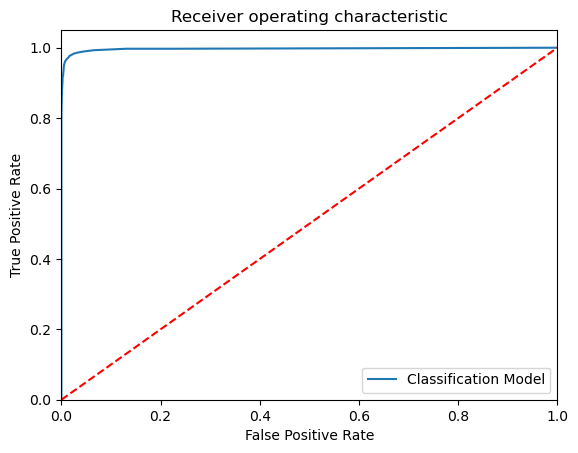

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 2049   380]
 [    6 19093]]
Outcome values : 
 2049 380 6 19093
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.84      0.91      2429
           0       0.98      1.00      0.99     19099

    accuracy                           0.98     21528
   macro avg       0.99      0.92      0.95     21528
weighted avg       0.98      0.98      0.98     21528

Accuracy : 98.2 %
Precision : 99.7 %
Recall : 84.4 %
F1 Score : 0.914
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 92.2 %
MCC : 0
roc_auc_score: 0.922


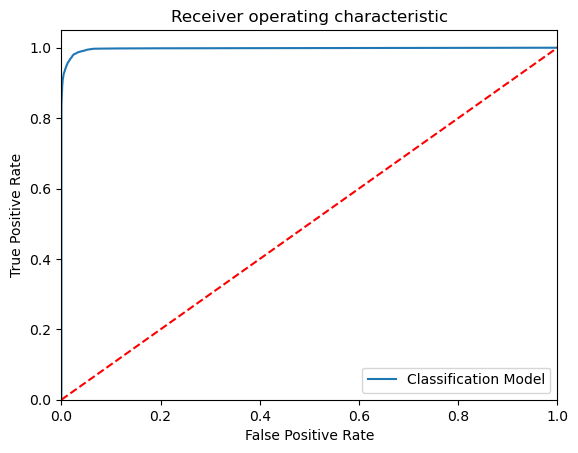

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[ 2073   356]
 [  167 18932]]
Outcome values : 
 2073 356 167 18932
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.85      0.89      2429
           0       0.98      0.99      0.99     19099

    accuracy                           0.98     21528
   macro avg       0.95      0.92      0.94     21528
weighted avg       0.98      0.98      0.98     21528

Accuracy : 97.6 %
Precision : 92.5 %
Recall : 85.3 %
F1 Score : 0.888
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 92.2 %
MCC : 0
roc_auc_score: 0.922


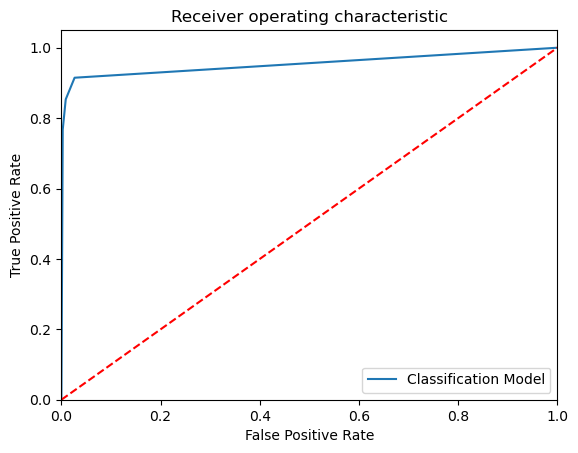

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', kernel='poly', probability=True, random_state=42)
Confusion matrix : 
 [[ 1789   640]
 [  666 18433]]
Outcome values : 
 1789 640 666 18433
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.74      0.73      2429
           0       0.97      0.97      0.97     19099

    accuracy                           0.94     21528
   macro avg       0.85      0.85      0.85     21528
weighted avg       0.94      0.94      0.94     21528

Accuracy : 93.9 %
Precision : 72.9 %
Recall : 73.7 %
F1 Score : 0.733
Specificity or True Negative Rate : 96.5 %
Balanced Accuracy : 85.1 %
MCC : 0
roc_auc_score: 0.851


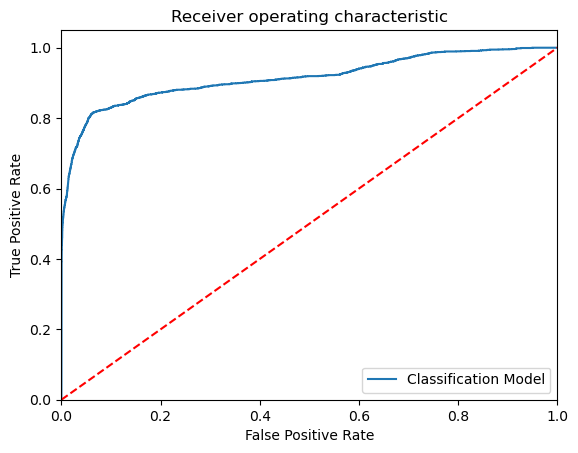

-----------------------------------------------------------------------------------------------------


In [42]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=3)
ModelSVM = SVC(kernel='poly', random_state = 42, class_weight='balanced', probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM]

for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    #MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    MCC=0

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMRESULTS = EMRESULTS.append(new_row, ignore_index=True)
    #------------------------------------------------------------------------------------------------------------------

In [43]:
EMRESULTS

Model Name True_Positive  \
0                                       SVM - Linear           568   
1                                  SVM - Polynominal          1027   
2                                     SVM - Gaussian          1940   
3                                      SVM - Sigmoid          1027   
4                               LogisticRegression()           648   
5                           DecisionTreeClassifier()          1497   
6  (DecisionTreeClassifier(max_features='auto', r...          2003   
7  (ExtraTreeClassifier(random_state=428308745), ...          2049   
8                KNeighborsClassifier(n_neighbors=3)          2073   
9  SVC(class_weight='balanced', kernel='poly', pr...          1789   

  False_Negative False_Positive True_Negative  Accuracy  Precision  Recall  \
0           1861             10         19089     0.913      0.983   0.234   
1           1402              6         19093     0.935      0.994   0.423   
2            489           1161         17938     0.923      0.626   0.799   
3           1402          10690          8409     0.438      0.088   0.423   
4           1781             69         19030     0.914      0.904   0.267   
5            932             17         19082     0.956      0.989   0.616   
6            426              6         19093     0.980      0.997   0.825   
7            380              6         19093     0.982      0.997   0.844   
8            356            167         18932     0.976      0.925   0.853   
9            640            666         18433     0.939      0.729   0.737   

   F1 Score  Specificity    MCC  ROC_AUC_Score  Balanced Accuracy  
0     0.378        0.999  0.457       0.616659              0.616  
1     0.593        1.000  0.625       0.711247              0.712  
2     0.702        0.939  0.665       0.868947              0.869  
3     0.145        0.440 -0.087       0.431546              0.432  
4     0.412        0.996  0.000       0.631582              0.632  
5     0.759        0.999  0.000       0.807706              0.808  
6     0.903        1.000  0.000       0.912153              0.912  
7     0.914        1.000  0.000       0.921621              0.922  
8     0.888        0.991  0.000       0.922347              0.922  
9     0.733        0.965  0.000       0.850823              0.851

In [46]:
#predict the values with ET algorithms
y_predF=ModelET.predict(x_test)

In [47]:
# Create a list for plotting the decision trees

figcols = ['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']

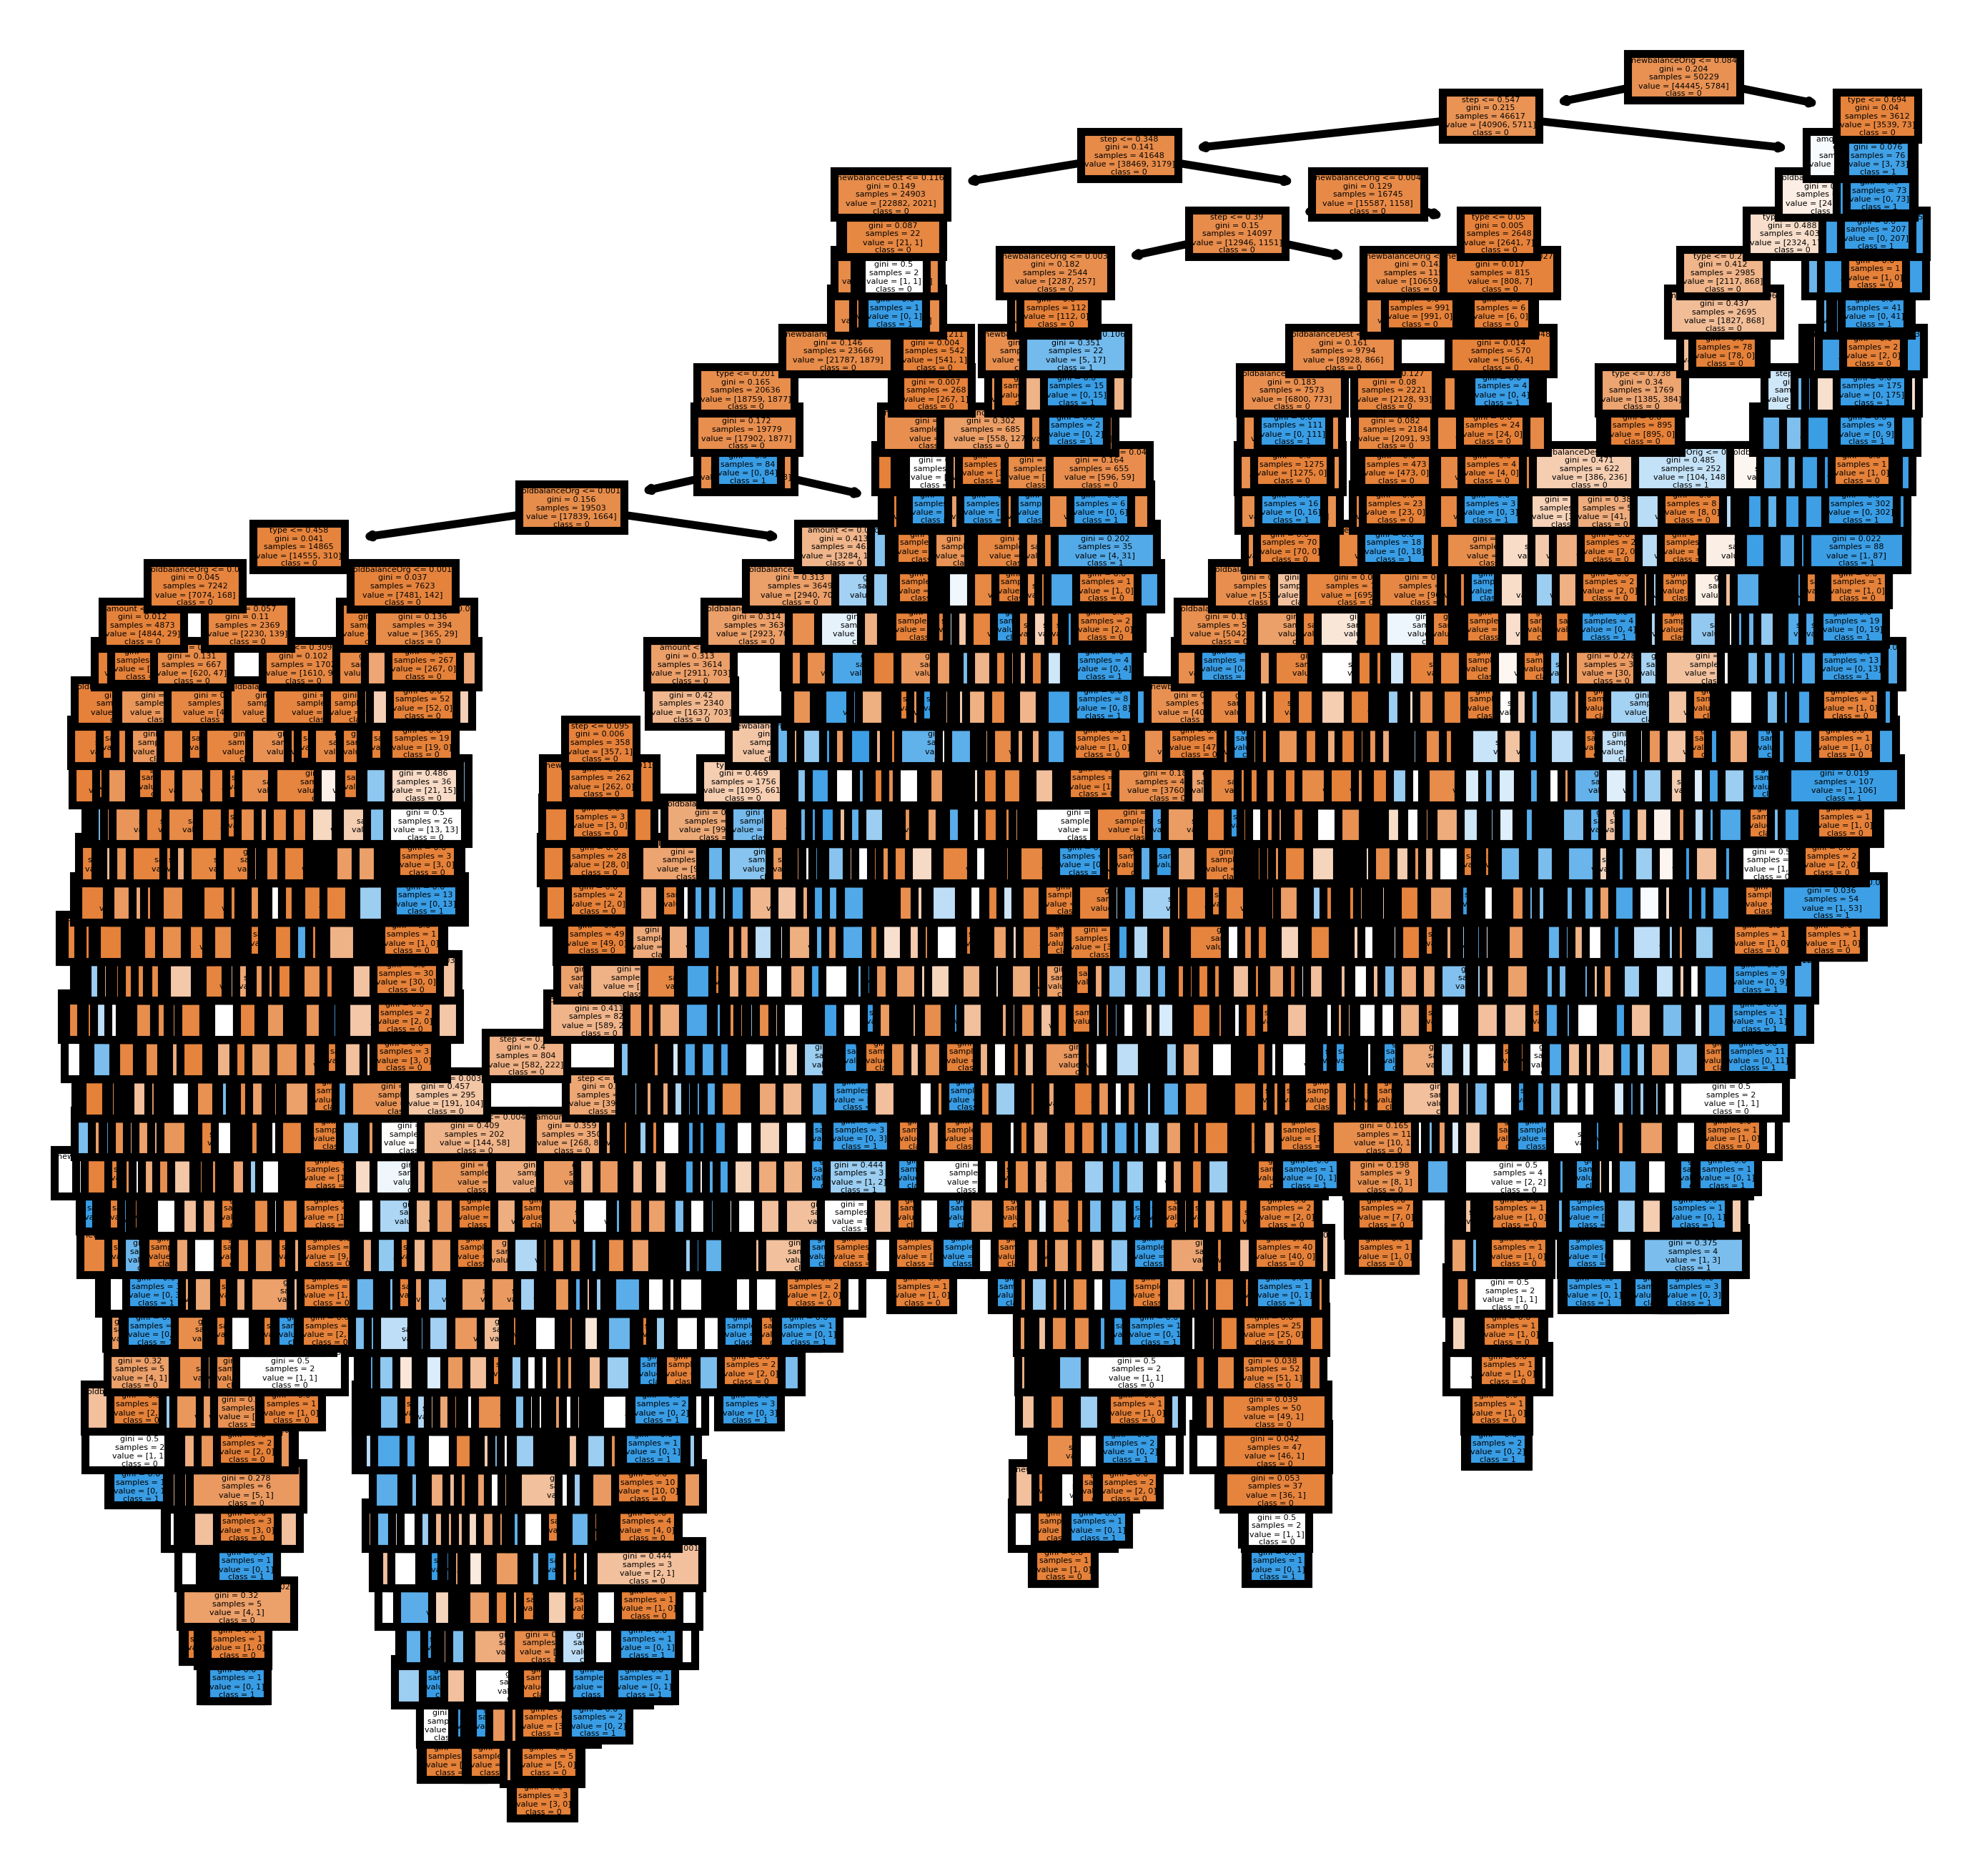

In [48]:
# Visualize individual trees and code below visualizes the first decision tree of Extra Trees Classifier

from sklearn import tree

fn1=figcols
cn1=['0', '1']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=800)
tree.plot_tree(ModelET.estimators_[0],
               feature_names = fn1, 
               class_names=cn1,
               filled = True);
#fig.savefig('ModelET.png')

In [49]:
# Visualize individual trees and code below visualizes the first 5 decision trees of Extra Trees Classifier

from sklearn import tree

fn2=figcols
cn2=['0', '1']

fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (10,2), dpi=3000)
for index in range(0, 5):
    tree.plot_tree(ModelET.estimators_[index],
                   feature_names = fn2, 
                   class_names=cn2,
                   filled = True,
                   ax = axes[index]);
    
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
#fig.savefig('ModelET1.png')

In [50]:
Results= pd.DataFrame({'isFraud_A':y_test, 'isFraud_p':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal =OP_fraud_Data.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(5)

step  type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
67115     9     3    7425.13           0.00             0.0            0.00   
20261   235     0  229640.60           0.00        229640.6      2440958.82   
25910   131     0  198367.05      110699.45        309066.5       390662.81   
48778   182     3    9010.03           0.00             0.0            0.00   
40337   377     1  114823.21           0.00             0.0       906693.21   

       newbalanceDest  isFraud  isFraud_A  isFraud_p  
67115            0.00        0          0          0  
20261      2211318.21        0          0          0  
25910       192295.76        0          0          0  
48778            0.00        0          0          0  
40337      1021516.42        0          0          0